# NVCL_KIT Close Up Core Image Demonstration

*Acknowledgement: Borehole dataset courtesy of Mineral Resources Tasmania. (https://www.mrt.tas.gov.au/home)*

In [1]:
from nvcl_kit.reader import NVCLReader
from nvcl_kit.param_builder import param_builder
from nvcl_kit.generators import gen_core_images

**Build parameters**

In [2]:
param = param_builder('tas', max_boreholes=25)
if not param:
    print("Cannot build parameters for 'tas'")

**Initialise reader object**

In [3]:
reader = NVCLReader(param)
if not reader.wfs:
    print("ERROR!")

**Get nvcl id from a borehole named 'MAC23'**

In [4]:
my_nvclids = reader.filter_feat_list(nvcl_ids_only=True, name='MAC23')
print(my_nvclids)

['10026']


**Get log id and image number range from 'MAC23' borehole**

In [5]:
for n_id, dsid, ilog, depth_list, html in gen_core_images(reader, nvcl_id_list=my_nvclids, max_magnify = True):
    log_id = ilog.log_id
    maximum_image_no = len(depth_list)
    print(f"log id: {log_id}")
    print(f"image number range: 0..{maximum_image_no -1}")
    break

    

log id: 013bb457-533f-46bb-adfa-932c4d2bb27
image number range: 0..41431


**Concatenate closeup core images from 'MAC23' borehole, from "start_image_no" to "final_image_no", then save and display**

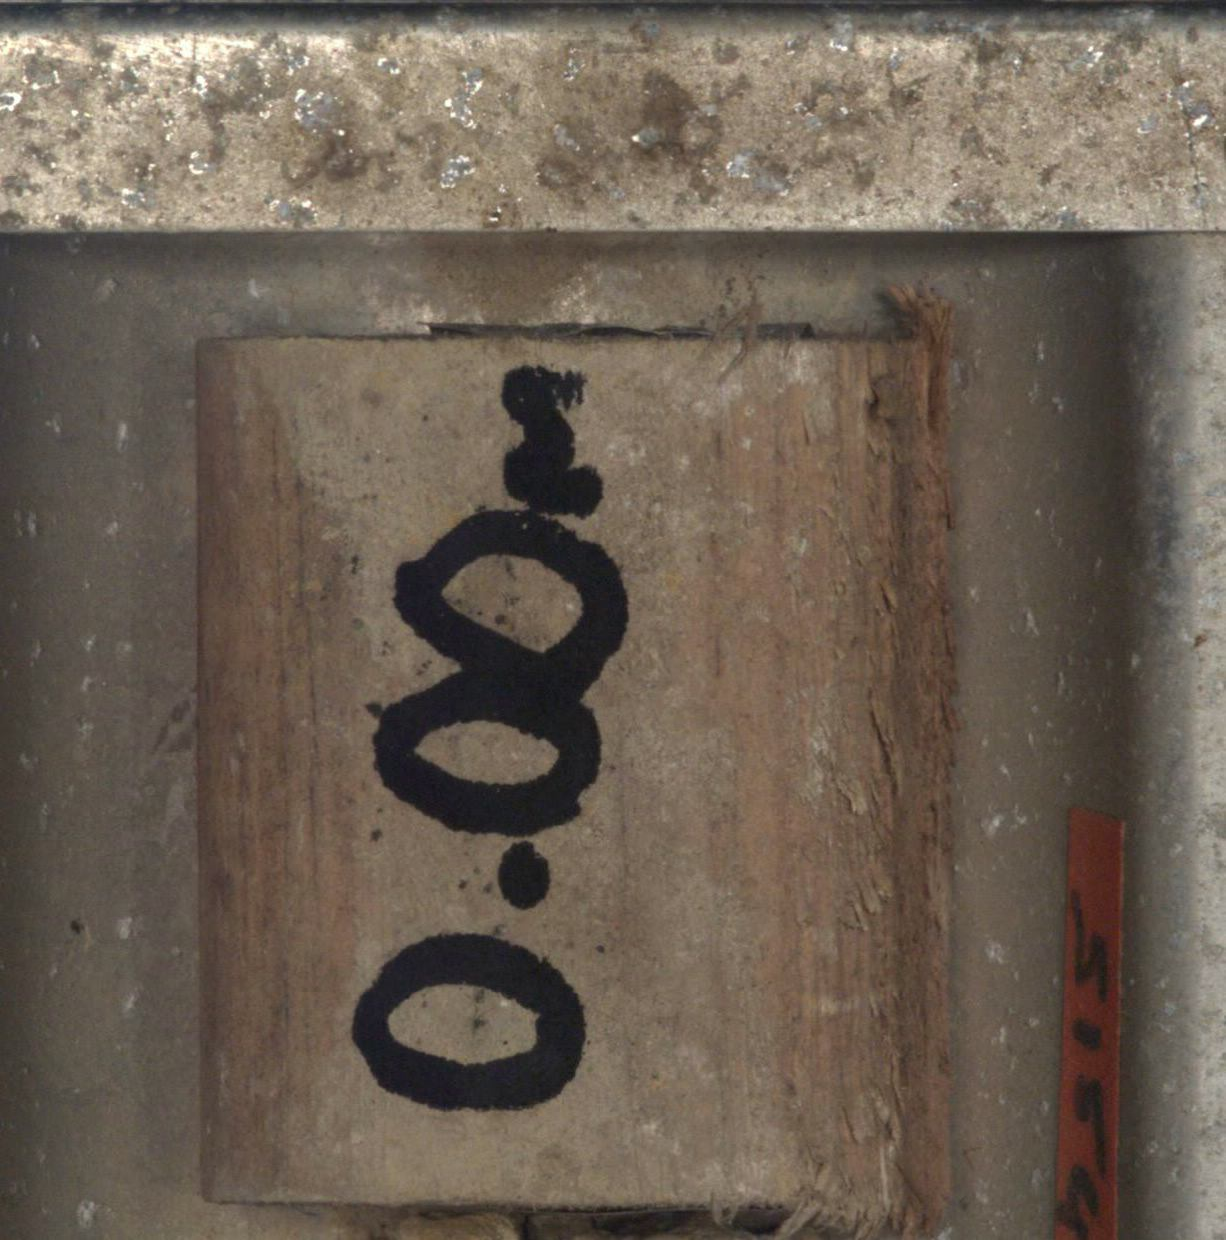

In [6]:
from PIL import Image
import io

start_image_no = 0
final_image_no = 10

# Retrieve image slices and join them up
total_bytes = b''
for i in range(start_image_no, final_image_no):
  img_bytes = reader.get_tray_thumb_jpg(log_id, i)
  image = Image.open(io.BytesIO(img_bytes))
  total_bytes += image.tobytes()

# Create an image object, save to file and display
im = Image.frombytes(image.mode, (image.width, image.height*(final_image_no - start_image_no)), total_bytes)
im.save("MAC23.jpg")
display(im)